In [1]:
# This is the sample code to see what happens for changing the threshold value for prediction.
# For understanding the concept, check-out my article here ->
# https://medium.com/@sayanroy729/what-is-precision-recall-trade-off-3487db276ffc

In [2]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_openml
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_recall_curve

In [3]:
# load the mnist dataset
mnist = fetch_openml("mnist_784", version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [4]:
# define the dependent & independent variable
X, y = mnist["data"].to_numpy(), mnist["target"].to_numpy().astype(np.uint8)

print(f"Shape of independent variable: {X.shape}")
print(f"Shape of dependent variable:   {y.shape}")

Shape of independent variable: (70000, 784)
Shape of dependent variable:   (70000,)


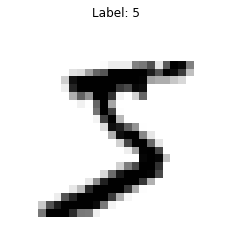

In [5]:
# now visalize a digit
some_digit       = X[0]
some_digit_image = some_digit.reshape(28, 28)

plt.imshow(some_digit_image, cmap="binary")
plt.axis("off")
plt.title(f"Label: {y[0]}")
plt.show()

In [6]:
# create training set and test set
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

# True for all 5s, False for all other digits. This will make binary classification problem
y_train_5 = (y_train == 5)
y_test_5  = (y_test  == 5)

In [7]:
# create a SGDClassifier
sgd_clf = SGDClassifier(random_state=42)

# scores based on decision function on training independent values
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method="decision_function")
y_scores

array([  1200.93051237, -26883.79202424, -33072.03475406, ...,
        13272.12718981,  -7258.47203373, -16877.50840447])

In [8]:
# compute precision-recall for all possible threshold values
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

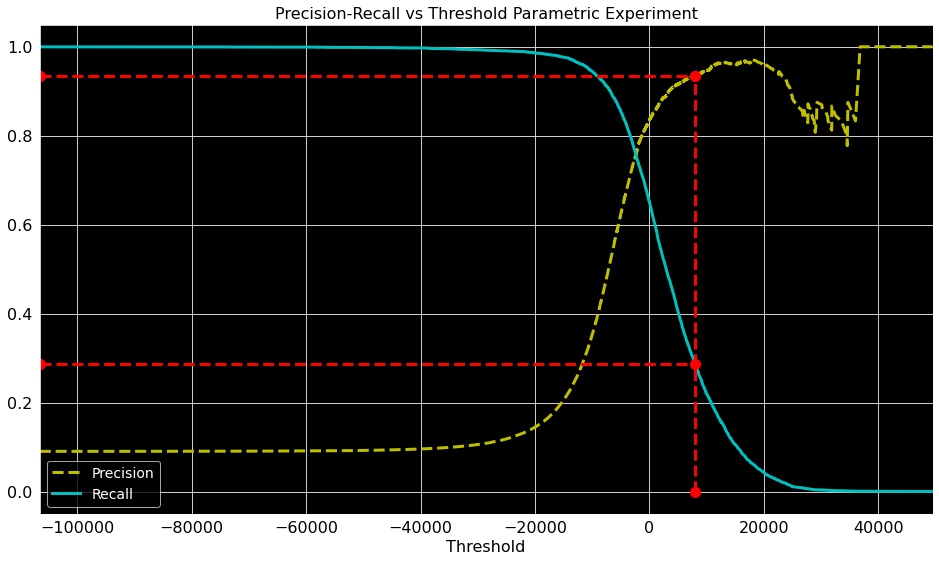

In [9]:
# display the graph
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    with plt.style.context('dark_background'):
        plt.plot(thresholds, precisions[:-1], "y--", linewidth=3, label="Precision")
        plt.plot(thresholds, recalls[:-1], "c-", linewidth=3, label="Recall")

        threshold_index = np.argwhere(thresholds >= 8000)[0][0]
        x_value         = thresholds[threshold_index]
        precision_value = precisions[threshold_index]
        recall_value    = recalls[threshold_index]

        plt.plot([x_value, x_value], [0, precision_value], color="r", linestyle="--", 
                 marker="o", markersize=10, linewidth=3)
        plt.plot([thresholds.min(), x_value], [precision_value, precision_value], color="r", 
                 linestyle="--", marker="o", markersize=10,linewidth=3)
        plt.plot([thresholds.min(), x_value], [recall_value, recall_value], color="r", 
                 linestyle="--", marker="o", markersize=10, linewidth=3)
        
        plt.title("Precision-Recall vs Threshold Parametric Experiment", fontsize=16, color="black")
        plt.xlabel("Threshold", fontsize=16, color="black")
        plt.xlim(thresholds.min(), thresholds.max())
        plt.xticks(color="black", fontsize=16)
        plt.yticks(color="black", fontsize=16)
        plt.legend(fontsize=14)
        plt.grid()

plt.figure(figsize=(16, 9))
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()